In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

- There are 25000 N-body simulations of 3 planet systems. 
- Each was run up to 1.e9 orbits of the innermost planet. Time is in units of the innermost's (initial) orbital period
- If planets collided, the time is recorded under instability_time. 
- Stable is a boolean for whether instability_time reached the max of 1e9 orbits without collisions
- can use stable for classification, instability_time for regression problem
- the only parameters are the masses of the planets for each run, encoded under m1, m2, m3

In [2]:
tseriesfolder = '/mnt/ssd/workspace/stability/stabilitydataset/data/random/shortruntseries2019-03-01Norbits1e4Nout1729/'
tseries = np.load(tseriesfolder+'timeseries.npy')

In [4]:
df = pd.read_csv(tseriesfolder+'metadata.csv', index_col=0)
df.head()

,runstring,instability_time,m1,m2,m3,Stable
0,0000000.bin,1.235644e+07,3.414016e-05,1.878725e-05,1.826900e-06,False
1,0000001.bin,1.348749e+05,2.529838e-07,3.485790e-05,1.955797e-05,False
2,0000002.bin,1.276381e+04,7.380789e-05,6.974008e-05,1.477931e-07,False
3,0000003.bin,1.000000e+09,5.174804e-07,4.292276e-06,1.287851e-06,True
4,0000004.bin,8.791888e+01,5.106746e-07,2.039380e-07,1.542321e-06,False


- This file (~6 GB) has time series for each of the 25000 runs, using the indices above. 
- Each system has 1729 recorded times (chosen so as to be 'relatively prime' and minimize sampling issues)
- Each time has 18 values
- index 0-5 are first planet's semimajor axis, eccentricity, inclination, longitude of ascending node, longitude of pericenter, and mean anomaly
- index 6-11 are for the second planet, same things
- index 12-17 are for the third planet

In [5]:
tseries.shape

(25000, 1729, 18)

All simulations share the exact same sampling of evenly spaced times, here:

In [6]:
times = np.load(tseriesfolder+'times.npy')
times.shape

(1729,)

In [7]:
times

array([0.00000000e+00, 5.78703704e+00, 1.15740741e+01, ...,
       9.98842593e+03, 9.99421296e+03, 1.00000000e+04])

Plot simulation with index 178's eccentricity evolution of the 2nd planet: 

In [8]:
system = tseries[178, :, :]

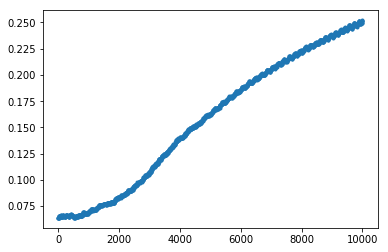

In [19]:
fig, ax = plt.subplots()
ax.plot(times, system[:,7], '.')

We only want to analyze the systems that remained stable beyond 1e4 orbits (since we're doing the short integration anyway so no need to run it through when Nbody shows it's unstable). So you would only use the samples with 'instability_time' > 1e4 for training

In [20]:
dfcut = df[df['instability_time']>1e4]
dfcut.shape

(17522, 5)

In [21]:
dfcut.head()

,instability_time,m1,m2,m3,Stable
0,1.235644e+07,3.414016e-05,0.000019,1.826900e-06,False
1,1.348749e+05,2.529838e-07,0.000035,1.955797e-05,False
2,1.276381e+04,7.380789e-05,0.000070,1.477931e-07,False
3,1.000000e+09,5.174804e-07,0.000004,1.287851e-06,True
5,1.000000e+09,7.391032e-06,0.000017,2.429857e-05,True


I think you could grab them like this. Worth checking:

In [24]:
dfcut.index

Int64Index([    0,     1,     2,     3,     5,    10,    11,    13,    14,
               15,
            ...
            24984, 24987, 24990, 24991, 24992, 24994, 24995, 24997, 24998,
            24999],
           dtype='int64', length=17522)

In [25]:
test = tseries[dfcut.index, :, :]

In [26]:
test.shape

(17522, 1729, 18)